# **Diabetes Prediction**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Importing Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE3087/Project/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# **Data Preprocessing**

In [ ]:
data.drop(data.index[data.gender == 'Other'], axis=0, inplace=True)
print(data.shape)

print(data.gender.unique())

(99982, 9)
['Female' 'Male']


In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label = le.fit_transform(data.gender)

In [ ]:
data.drop('gender', axis=1, inplace=True)
print(data)

        age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  \
0      80.0             0              1           never  25.19          6.6   
1      54.0             0              0         No Info  27.32          6.6   
2      28.0             0              0           never  27.32          5.7   
3      36.0             0              0         current  23.45          5.0   
4      76.0             1              1         current  20.14          4.8   
...     ...           ...            ...             ...    ...          ...   
99995  80.0             0              0         No Info  27.32          6.2   
99996   2.0             0              0         No Info  17.37          6.5   
99997  66.0             0              0          former  27.83          5.7   
99998  24.0             0              0           never  35.42          4.0   
99999  57.0             0              0         current  22.43          6.6   

       blood_glucose_level  diabetes  


In [ ]:
data['genderEncoded'] = label   #Female - 0, Male - 1
print(data)

        age  hypertension  heart_disease smoking_history    bmi  HbA1c_level  \
0      80.0             0              1           never  25.19          6.6   
1      54.0             0              0         No Info  27.32          6.6   
2      28.0             0              0           never  27.32          5.7   
3      36.0             0              0         current  23.45          5.0   
4      76.0             1              1         current  20.14          4.8   
...     ...           ...            ...             ...    ...          ...   
99995  80.0             0              0         No Info  27.32          6.2   
99996   2.0             0              0         No Info  17.37          6.5   
99997  66.0             0              0          former  27.83          5.7   
99998  24.0             0              0           never  35.42          4.0   
99999  57.0             0              0         current  22.43          6.6   

       blood_glucose_level  diabetes  g

In [ ]:
data.drop(['smoking_history'], axis=1, inplace=True)
data.columns

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'genderEncoded'],
      dtype='object')

# **Data Visualization**

In [ ]:
sns.pairplot(data,hue='diabetes')

<Axes: >

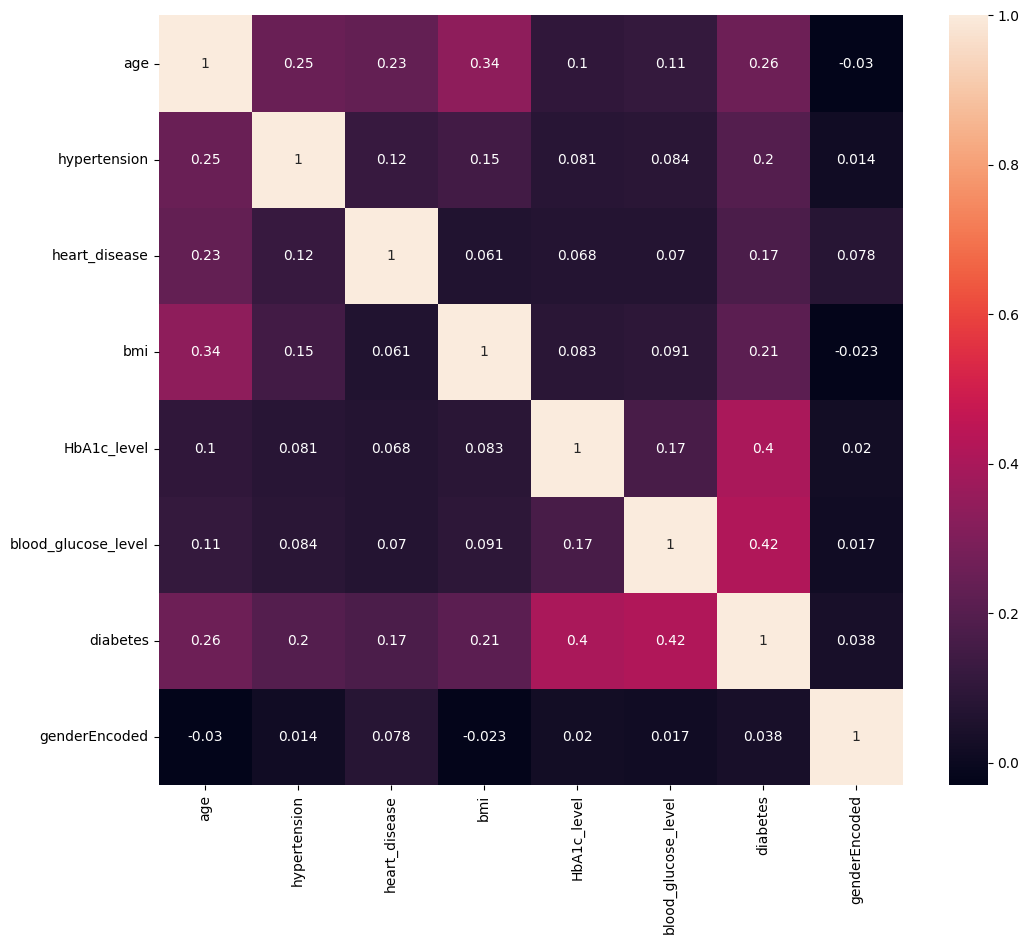

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

In [ ]:
#Creating a function for printing Accuracy Score, Confusion Matrix, Classification Report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def print_score(clf,X_train,y_train,X_test,y_test,train=True):
  if train:
    pred = clf.predict(X_train)
    clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
    print("Train Result:\n=======================================================")
    print(f"Accuracy Score: {accuracy_score(y_train,pred)*100:.2f}%")
    print("_______________________________________________________")
    print(f"Classification Report:\n{clf_report}")
    print("_______________________________________________________")
    print(f"Confusion Matrix: \n{confusion_matrix(y_train,pred)}\n")

  elif train==False:
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
    print("Test result:\n========================================================")
    print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
    print("_______________________________________________________")
    print(f"Classification Report:\n {clf_report}")
    print("_______________________________________________________")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")

# **Splitting the Dataset**

In [ ]:
X = data.drop(['diabetes'],axis=1)
y = data.diabetes

# **Splitting into Train and Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# **Classification using different Techniques**

# Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
print_score(gnb, X_train, y_train, X_test, y_test, train=True)
print_score(gnb, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.40%
_______________________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.966152     0.450796  0.903995      0.708474      0.922792
recall         0.927676     0.646220  0.903995      0.786948      0.903995
f1-score       0.946523     0.531101  0.903995      0.738812      0.911571
support    68677.000000  6309.000000  0.903995  74986.000000  74986.000000
_______________________________________________________
Confusion Matrix: 
[[63710  4967]
 [ 2232  4077]]

Test result:
Accuracy Score: 90.26%
_______________________________________________________
Classification Report:
                       0            1  accuracy     macro avg  weighted avg
precision      0.964348     0.460157  0.902584      0.712252      0.920153
recall         0.927516     0.643085  0.902584      0.785301      0.902584
f1-score       0.945573     0.536455  0.902584      0.741014 

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
print_score(lr, X_train, y_train, X_test, y_test, train=True)
print_score(lr, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.02%
_______________________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.965096     0.881045  0.960206      0.923071      0.958025
recall         0.992443     0.609288  0.960206      0.800866      0.960206
f1-score       0.978579     0.720390  0.960206      0.849484      0.956856
support    68677.000000  6309.000000  0.960206  74986.000000  74986.000000
_______________________________________________________
Confusion Matrix: 
[[68158   519]
 [ 2465  3844]]

Test result:
Accuracy Score: 95.98%
_______________________________________________________
Classification Report:
                       0            1  accuracy     macro avg  weighted avg
precision      0.964342     0.889035  0.959754      0.926688      0.957741
recall         0.992589     0.617983  0.959754      0.805286      0.959754
f1-score       0.978262     0.729133  0.959754      0.853697 

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc = SVC(probability=True,random_state=42)
svc.fit(X_train,y_train)
print_score(svc, X_train, y_train, X_test, y_test, train=True)
print_score(svc, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 94.84%
_______________________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.946668     1.000000  0.948404      0.973334      0.951155
recall         1.000000     0.386749  0.948404      0.693375      0.948404
f1-score       0.972604     0.557778  0.948404      0.765191      0.937702
support    68677.000000  6309.000000  0.948404  74986.000000  74986.000000
_______________________________________________________
Confusion Matrix: 
[[68677     0]
 [ 3869  2440]]

Test result:
Accuracy Score: 94.61%
_______________________________________________________
Classification Report:
                       0            1  accuracy     macro avg  weighted avg
precision      0.944226     0.998817  0.946071      0.971521      0.949011
recall         0.999956     0.385212  0.946071      0.692584      0.946071
f1-score       0.971292     0.555995  0.946071      0.763644 

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print_score(dt, X_train, y_train, X_test, y_test, train=True)
print_score(dt, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.81%
_______________________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.997922     1.000000  0.998093      0.998961      0.998097
recall         1.000000     0.977334  0.998093      0.988667      0.998093
f1-score       0.998960     0.988537  0.998093      0.993749      0.998083
support    68677.000000  6309.000000  0.998093  74986.000000  74986.000000
_______________________________________________________
Confusion Matrix: 
[[68677     0]
 [  143  6166]]

Test result:
Accuracy Score: 95.24%
_______________________________________________________
Classification Report:
                       0            1  accuracy     macro avg  weighted avg
precision      0.975034     0.722940  0.952392      0.848987      0.952937
recall         0.972725     0.740758  0.952392      0.856741      0.952392
f1-score       0.973878     0.731740  0.952392      0.852809 

Using GridSearchCV to find optimal hyperparameters for Decision Tree Classifier

In [ ]:
parameter = {'criterion':['gini','entropy','log_loss'],'splitter':['best','random'],'max_depth':[1,2,3,4,5],'max_features':['auto','sqrt','log2']}
from sklearn.model_selection import GridSearchCV
treemodel1 = DecisionTreeClassifier()
cv = GridSearchCV(treemodel1,param_grid=parameter,cv=5,scoring='accuracy')
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
print_score(cv, X_train, y_train, X_test, y_test, train=True)
print_score(cv, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.52%
_______________________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.953344     1.000000  0.955178      0.976672      0.957269
recall         1.000000     0.467269  0.955178      0.733634      0.955178
f1-score       0.976115     0.636923  0.955178      0.806519      0.947577
support    68677.000000  6309.000000  0.955178  74986.000000  74986.000000
_______________________________________________________
Confusion Matrix: 
[[68677     0]
 [ 3361  2948]]

Test result:
Accuracy Score: 95.22%
_______________________________________________________
Classification Report:
                       0            1  accuracy     macro avg  weighted avg
precision      0.950208     1.000000  0.952192      0.975104      0.954573
recall         1.000000     0.454587  0.952192      0.727293      0.952192
f1-score       0.974469     0.625039  0.952192      0.799754 

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, min_samples_leaf = 27, oob_score=True, random_state=42)
rf.fit(X_train,y_train)
print_score(rf, X_train, y_train, X_test, y_test, train=True)
print_score(rf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.21%
_______________________________________________________
Classification Report:
                      0            1  accuracy     macro avg  weighted avg
precision      0.970412     1.000000  0.972075      0.985206      0.972901
recall         1.000000     0.668093  0.972075      0.834047      0.972075
f1-score       0.984984     0.801026  0.972075      0.893005      0.969506
support    68677.000000  6309.000000  0.972075  74986.000000  74986.000000
_______________________________________________________
Confusion Matrix: 
[[68677     0]
 [ 2094  4215]]

Test result:
Accuracy Score: 97.12%
_______________________________________________________
Classification Report:
                       0            1  accuracy     macro avg  weighted avg
precision      0.969435     1.000000  0.971235      0.984718      0.972115
recall         1.000000     0.671839  0.971235      0.835920      0.971235
f1-score       0.984481     0.803713  0.971235      0.894097 

Plotting Feature Importance as per RandomForestClassifier

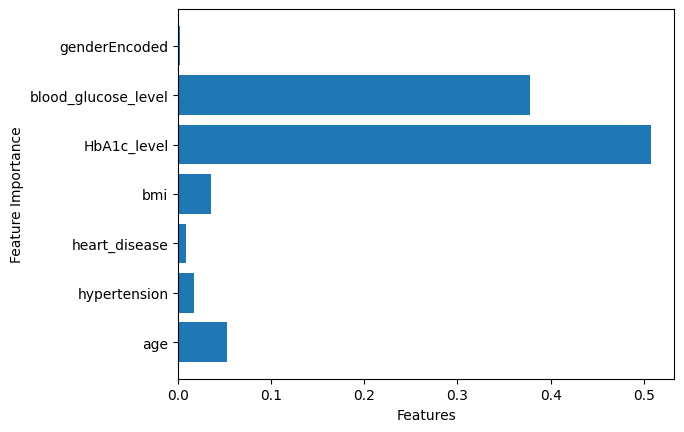

In [ ]:
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
plt.barh(feature_importance.index, feature_importance)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.show()

# **Diabetes Predictor**

In [ ]:
def RandomForest_Diabetes_predictor():
  input = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/CSE3087/Project/diabetic_patient_data.xlsx')
  csv_converted = input.to_csv('diabetic_patient_data.csv',index = None, header=True)
  input_csv = pd.read_csv('diabetic_patient_data.csv')
  user_data = pd.DataFrame(input_csv, columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level','blood_glucose_level','genderEncoded'])
  pred = rf.predict(user_data)
  results = []
  for num in pred:
    if num == 0:
      results.append('No')
    else:
      results.append('Yes')

  user_data["Prediction"] = results
  print(tabulate(user_data, headers = 'keys', tablefmt = 'psql'))

RandomForest_Diabetes_predictor()

+----+-------+----------------+-----------------+-------+---------------+-----------------------+-----------------+--------------+
|    |   age |   hypertension |   heart_disease |   bmi |   HbA1c_level |   blood_glucose_level |   genderEncoded | Prediction   |
|----+-------+----------------+-----------------+-------+---------------+-----------------------+-----------------+--------------|
|  0 |    45 |              0 |               0 | 25.15 |           4   |                   145 |               1 | No           |
|  1 |    50 |              1 |               0 | 27.32 |           5.7 |                   260 |               1 | Yes          |
+----+-------+----------------+-----------------+-------+---------------+-----------------------+-----------------+--------------+
